In [11]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA, FastICA
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people

#### Load the dataset

In [12]:
peopledata= fetch_lfw_people('data', min_faces_per_person =70, resize=0.4)

In [13]:
n_samples,height,width = peopledata.images.shape
X= peopledata.data
n_features = X.shape[1]
# predict the person id
y= peopledata.target
target_names = peopledata.target_names
n_classes = target_names.shape[0]

# Display dataset details 
print("The size of the data sample is: %d" % n_features)
print("The number of data samples is: %d" % n_samples)
print(" The number of class labels is: %d" % n_classes)

The size of the data sample is: 1850
The number of data samples is: 1288
 The number of class labels is: 7


In [4]:
# split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.25,random_state =42)

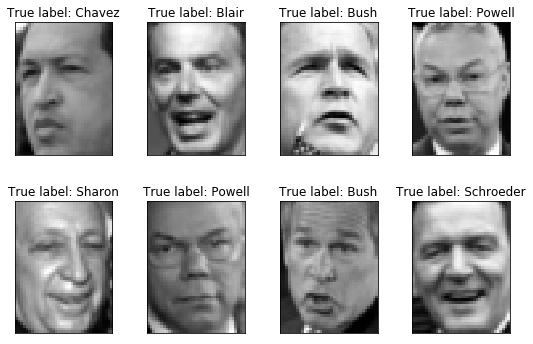

In [5]:
# Plot the images
def plotimages(images,titles,height,width,n_row = 1, n_col= 4):
    pl.figure(figsize=(1.8*n_col,2.4*n_row))
    pl.subplots_adjust(bottom=0,left = .01, right = .99,top=.90 , hspace= 0.35)
    for i in range (n_row*n_col):
        pl.subplot(n_row,n_col, i+1)
        pl.imshow(images[i].reshape((height,width)), cmap = 'gray')
        pl.title(titles[i], size = 12)
        pl.xticks(())
        pl.yticks(())
        
# Give true labels to image
def truelabel(Y, target_names,i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'True label: %s' % (true_name)
truelabels = [truelabel(y, target_names,i)for i in range(y.shape[0])]
plotimages(X, truelabels, height,width)
    

###### Compute the PCA and ICA


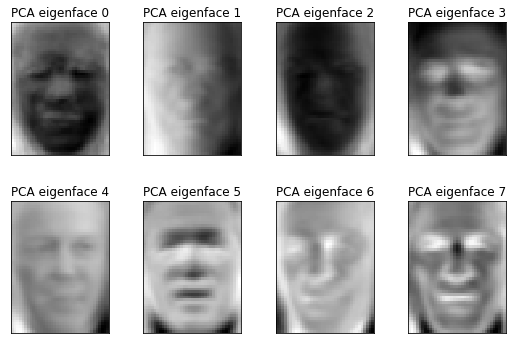

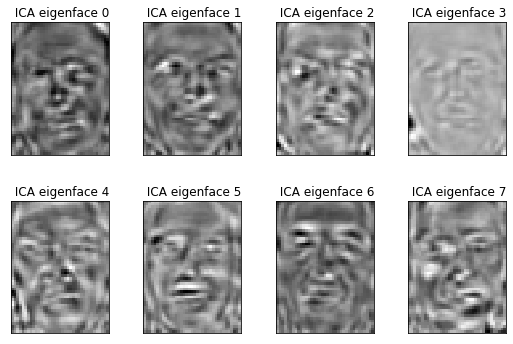

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.00      0.00      0.00        60
  Donald Rumsfeld       0.00      0.00      0.00        27
    George W Bush       0.45      1.00      0.62       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        36

         accuracy                           0.45       322
        macro avg       0.06      0.14      0.09       322
     weighted avg       0.21      0.45      0.28       322



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.77      0.65        13
     Colin Powell       0.78      0.82      0.80        60
  Donald Rumsfeld       0.66      0.78      0.71        27
    George W Bush       0.95      0.84      0.89       146
Gerhard Schroeder       0.61      0.76      0.68        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.85      0.81      0.83        36

         accuracy                           0.81       322
        macro avg       0.73      0.78      0.75       322
     weighted avg       0.83      0.81      0.82       322



In [8]:
#compute pca
n_components = 150
pca = PCA(n_components, svd_solver = 'randomized').fit(X_train)
eigenfacespca = pca.components_.reshape((n_components, height,width))
X_train_pca = pca.transform(X_train)
X_test_pca= pca.transform(X_test)
eigenfacepca_title= ["PCA eigenface %d" % i for i in range(eigenfacespca.shape[0])]
plotimages(eigenfacespca, eigenfacepca_title, height , width)
pl.show()

# compute ica
ica= FastICA(n_components).fit(X_train)
eigenfacesica = ica.components_.reshape((n_components, height,width))
X_train_ica = ica.transform(X_train)
X_test_ica= ica.transform(X_test)
eigenfaceica_title= [" ICA eigenface %d" % i for i in range(eigenfacesica.shape[0])]
plotimages(eigenfacesica, eigenfaceica_title, height , width)
pl.show()


#Fit the SVM classfier to training set
param_grid={'C':[1e3,5e3,1e4,5e4,1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='rbf',class_weight='balanced'),param_grid)
clfpca= clf.fit(X_train_pca, y_train)
y_predpca = clf.predict(X_test_pca)
print(classification_report(y_test,y_predpca,target_names=target_names))
clfica= clf.fit(X_train_ica, y_train)
y_predica = clf.predict(X_test_ica)
print(classification_report(y_test,y_predica,target_names=target_names))



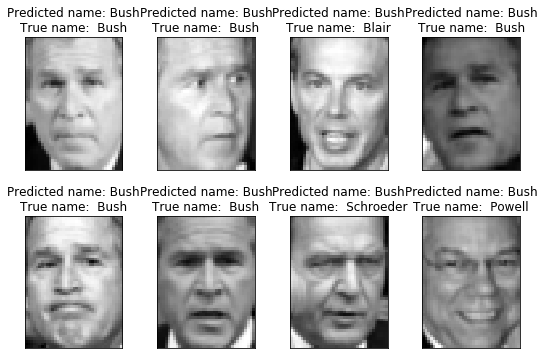

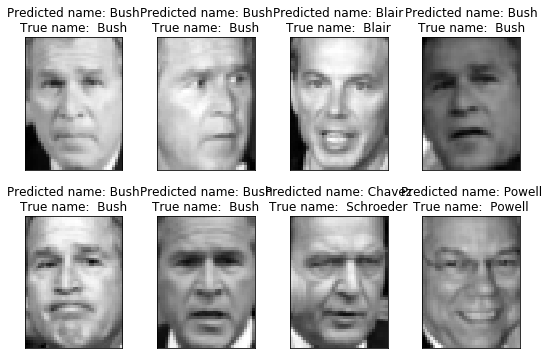

In [14]:
def headings(y_pred,y_test, target_names , i):
    predicted_name=target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name=target_names[y_test[i]].rsplit(' ', 1)[-1]
    return ('Predicted name: %s\nTrue name:  %s' %(predicted_name,true_name))
prediction_titles = [headings(y_predpca,y_test,target_names,i) for i in range (y_predpca.shape[0])]
plotimages(X_test, prediction_titles,height ,width)
pl.show()
prediction_titles = [headings(y_predica,y_test,target_names,i) for i in range (y_predica.shape[0])]
plotimages(X_test, prediction_titles,height ,width)
pl.show()